<a href="https://colab.research.google.com/github/fkvivid/DIVER/blob/main/decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics

In [3]:
class ScratchDecesionTreeClassifierDepth1():
  def __init__ (self, verbose=False):
    self.verbose=verbose
  
  def _gini(self,X):
    unique,count = np.unique(X,return_counts=True)
    tmp = 0

    for i in unique:
      tmp += (count[unique==i]/np.sum(count))**2

    return 1-tmp

  def fit (self,X,y):

    feature_num = X.shape[1]

    self.gain = 0

    for i in range(feature_num):
      self.threshold = np.unique(X[:,i])

      for j in self.threshold[1:]:
        l = y[X[:,i]<j]
        r = y[X[:,i]>=j]

        gini_l = len(l)/(len(l)+len(r))*self._gini(l)
        gini_r = len(r)/(len(l)+len(r))*self._gini(r)

        tmp = self._gini(y) - gini_l - gini_r

        if tmp>self.gain:
          self.l_label = statistics.mode(l)
          self.r_label = statistics.mode(r)
          self.feature = i
          self.threshold = j
          self.gain = tmp

          if self.verbose:
            print('feature', self.feature,
                  'threshold', self.threshold,
                  'gain', self.gain)
            
  def predict(self, X):
    
    return np.where(X[:,self.feature] < self.threshold, self.l_label, self.r_label)


In [4]:
# Visualizing the decision area
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(np.unique(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

[Problem 1] Function to find impurity

In [6]:
X = np.array([0,2,1,-1,4])
y = np.array([0,0,0,1,1])

In [8]:
threshold_value = np.unique(X)
print('threshold_value',threshold_value)

threshold_value [-1  0  1  2  4]


In [9]:
# Classify by label value
u,counts = np.unique(y,return_counts=True)

print('unique', u, 'unique_counts',counts)

unique [0 1] unique_counts [3 2]


In [12]:
# calculation of gini impurity
def _gini(X):
  unique,count = np.unique(X,return_counts=True)
  tmp = 0

  for i in unique:
    tmp += (count[unique==i]/np.sum(count))**2

  return 1-tmp

In [13]:
for i in threshold_value[1:]:
  c1 = y[X<i]
  c2 = y[X>=i]

  print(i,'c1',c1,'c2',c2)
  print(i,'gini_left',_gini(c1),'gini_right',_gini(c2))

0 c1 [1] c2 [0 0 0 1]
0 gini_left [0.] gini_right [0.375]
1 c1 [0 1] c2 [0 0 1]
1 gini_left [0.5] gini_right [0.44444444]
2 c1 [0 0 1] c2 [0 1]
2 gini_left [0.44444444] gini_right [0.5]
4 c1 [0 0 0 1] c2 [1]
4 gini_left [0.375] gini_right [0.]


[Problem 2] Function for obtaining information gain

In [14]:
# Calculate the information gain at each threshold

for i in threshold_value[1:]:
  c1 = y[X<i]
  c2 = y[X>=i]

  left = len(c1)/(len(c1)+len(c2))*_gini(c1)
  right = len(c2)/(len(c1)+len(c2))*_gini(c2)

  gain = _gini(X) - left - right

  print(i,gain)

0 [0.5]
1 [0.33333333]
2 [0.33333333]
4 [0.5]


[Question 3] Learning

In [21]:
X = np.array([[-0.44699,-2.8073], [-1.4621,-2.4586],
              [0.10645,1.9242], [-3.5944,-4.0112],
              [-0.9888,4.5718], [-3.1625,-3.9606],
              [ 0.56421,0.72888], [-0.60216, 8.4636],
              [-0.61251,-0.75345], [-0.73535,-2.2718],
              [-0.80647,-2.2135], [0.86291,2.3946],
              [-3.1108,0.15394], [-2.9362,2.5462],
              [-0.57242,-2.9915],[1.4771,3.4896],
              [0.58619,0.37158],[0.6017,4.3439],
              [-2.1086,8.3428],[-4.1013,-4.353],
              [-1.9948,-1.3927],[0.35084,-0.031994],
              [0.96765,7.8929],[-1.281,15.6824],
              [0.96765,10.083],[1.3763,1.3347],
              [-2.234,-2.5323],[-2.9452,-1.8219],
              [0.14654,-0.28733],[0.5461,5.8245],
              [-0.65259,9.3444],[0.59912,5.3523],
              [0.50214,-0.31818],[-3.0603,-3.6461],
              [-6.6797,0.67661],[-2.354,-0.72261],
              [1.1319,2.4023],[-0.12243,9.0162],
              [-2.5677,13.1779],[0.057313,5.4681]])

y = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
              1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1])

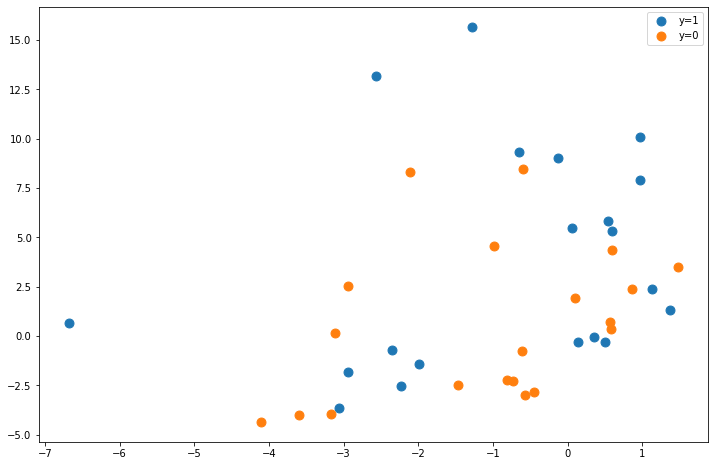

In [22]:
fig = plt.subplots(figsize=(12,8))
plt.scatter(X[y==1,0],X[y==1,1],s=80,label='y=1')
plt.scatter(X[y==0,0],X[y==0,1],s=80,label='y=0')
plt.legend()

In [23]:
# Split into training data and validation data

from sklearn.model_selection import train_test_split

X_train, X_valid, y_train,y_valid = train_test_split(X,y,train_size=0.8, random_state=None)

print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(32, 2)
(32,)
(8, 2)
(8,)


In [24]:
clf1 = ScratchDecesionTreeClassifierDepth1(verbose=True)
clf1.fit(X_train,y_train)

feature 0 threshold -4.1013 gain [0.01612903]
feature 0 threshold -3.0603 gain [0.01785714]
feature 0 threshold -0.60216 gain [0.01821862]
feature 0 threshold -0.57242 gain [0.03174603]
feature 0 threshold -0.44699 gain [0.04901961]
feature 0 threshold -0.12243 gain [0.0703125]
feature 1 threshold -1.8219 gain [0.07142857]


[Question 4] Estimation

In [25]:
y_pred = clf1.predict(X_valid)

In [26]:
print(y_pred)
print(y_valid)

[0 0 1 1 1 1 0 1]
[0 0 1 0 1 0 1 1]


[Question 5] Learning and Estimation

In [27]:
# Evaluation index
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

accuracy = accuracy_score(y_valid,y_pred)
precision = precision_score(y_valid,y_pred)
recall = recall_score(y_valid,y_pred)
f1 = f1_score(y_valid,y_pred)

print('accuracy:',accuracy)
print('precision:',precision)
print('recall:',recall)
print('f1:',f1)

accuracy: 0.625
precision: 0.6
recall: 0.75
f1: 0.6666666666666665


In [28]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier

clf2 = DecisionTreeClassifier(max_depth=1)

clf2.fit(X_train,y_train)

y_pred = clf2.predict(X_valid)

In [29]:
print(y_pred)
print(y_valid)

[0 0 1 1 1 1 0 1]
[0 0 1 0 1 0 1 1]


In [30]:

accuracy = accuracy_score(y_valid,y_pred)
precision = precision_score(y_valid,y_pred)
recall = recall_score(y_valid,y_pred)
f1 = f1_score(y_valid,y_pred)

print('accuracy:',accuracy)
print('precision:',precision)
print('recall:',recall)
print('f1:',f1)

accuracy: 0.625
precision: 0.6
recall: 0.75
f1: 0.6666666666666665


[Problem 6] Visualization of the decision region

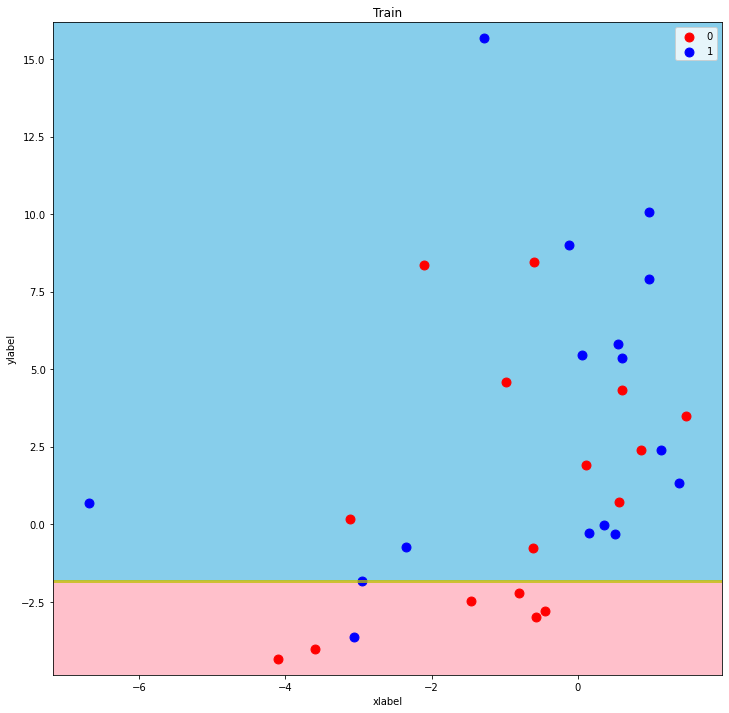

In [31]:
# Results of Scratch Decision Tree Classification
fig, ax = plt.subplots(figsize=(12,12))
decision_region(X_train,y_train, clf1, target_names=['0','1'], title='Train')

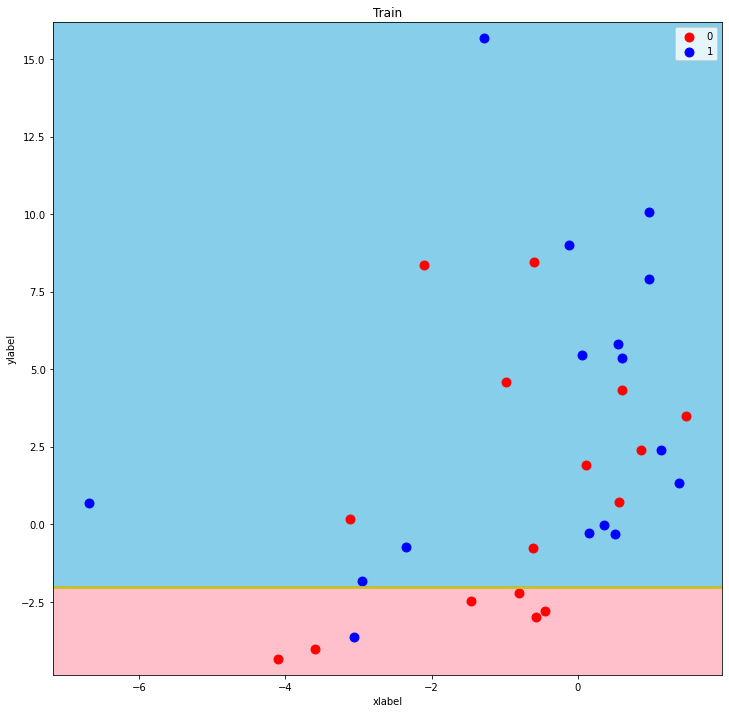

In [32]:
# Results of Scratch Decision Tree Classification
fig, ax = plt.subplots(figsize=(12,12))
decision_region(X_train,y_train, clf2, target_names=['0','1'], title='Train')